In [19]:
import numpy as np
import torch 
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
import os
import math
import matplotlib.pyplot as py
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
class adsorption_dataset(Dataset):
    def __init__(self):
        self.xy=np.loadtxt('C:\\Users\\mohit\\Desktop\\ANN\\Adsorption_Data.csv',delimiter=',',dtype=np.float64,skiprows=1)
        self.data=torch.from_numpy(self.xy[1:,:5])
        self.target=torch.from_numpy(self.xy[1:,[5]])
    def __len__(self):
        return len(self.target)
    def __getitem__(self,index):
        return self.data[index],self.target[index]

In [137]:
dataset = adsorption_dataset()
x=dataset.data
y=dataset.target
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1234)
x_train=x_train.float()

Text(0, 0.5, 'adsorption capacity')

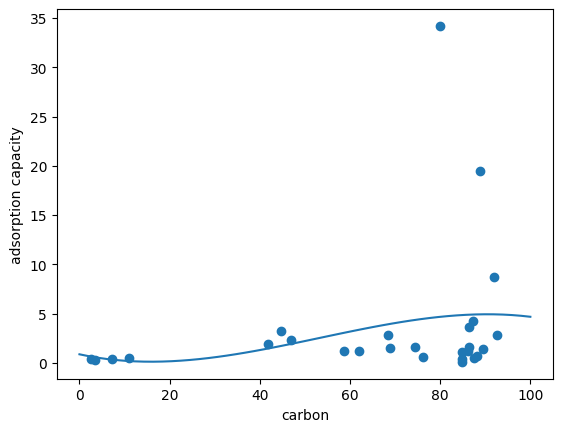

In [138]:
x=x_train[:,0].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(0,100,50)
py.scatter(x_train[:,[0]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('carbon')
py.ylabel('adsorption capacity')

Text(0, 0.5, 'adsorption capacity')

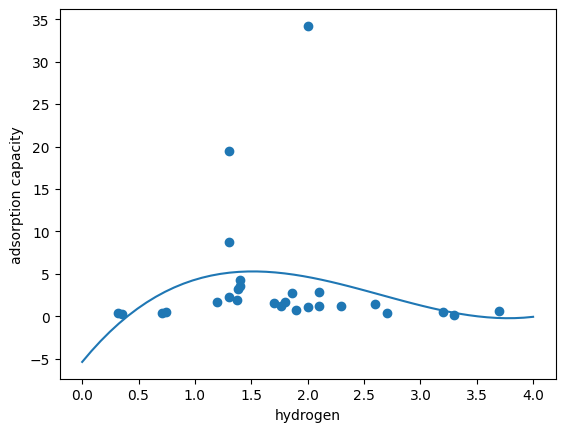

In [139]:
x=x_train[:,1].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(0,4,50)
py.scatter(x_train[:,[1]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('hydrogen')
py.ylabel('adsorption capacity')

Text(0, 0.5, 'adsorption capacity')

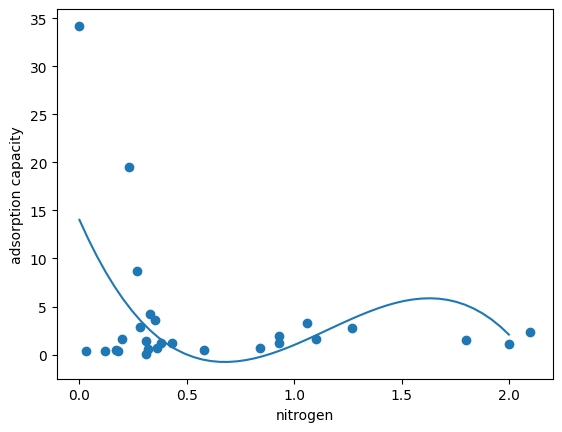

In [140]:
x=x_train[:,2].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(0,2,50)
py.scatter(x_train[:,[2]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('nitrogen')
py.ylabel('adsorption capacity')

Text(0, 0.5, 'adsorption capacity')

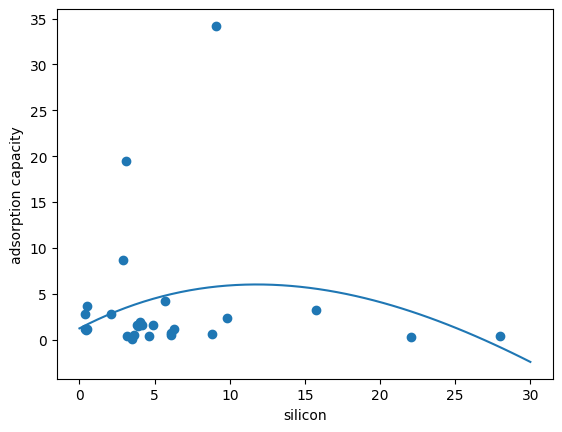

In [141]:
x=x_train[:,3].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(0,30,50)
py.scatter(x_train[:,[3]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('silicon')
py.ylabel('adsorption capacity')

Text(0, 0.5, 'adsorption capacity')

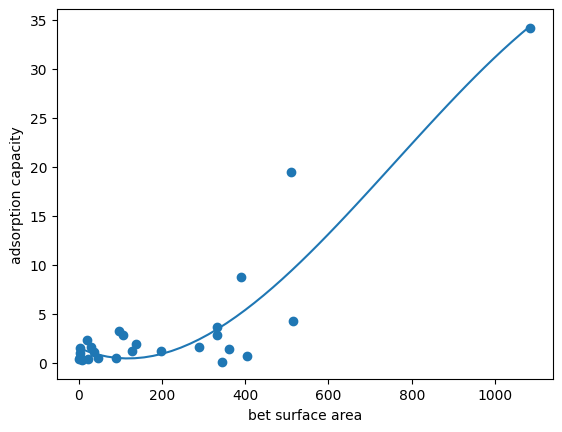

In [142]:
x=x_train[:,4].detach().cpu().numpy()
y=y_train[:,0].detach().cpu().numpy()
mymodel =np.poly1d(np.polyfit(x,y, 3))
myline = np.linspace(2.5,1085,50)
py.scatter(x_train[:,[4]],y_train)
py.plot(myline,mymodel(myline))
py.xlabel('bet surface area')
py.ylabel('adsorption capacity')

In [724]:
class model(nn.Module):
    def __init__(self,input_features=5,hidden1=27,hidden2=9,hidden3=3,output=100):
        super().__init__()
        self.fc1=nn.Linear(input_features,hidden1)
        self.fc2=nn.Linear(hidden1,hidden2)
        self.fc3=nn.Linear(hidden2,hidden3)
        self.out=nn.Linear(hidden3,output)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.out(x)
        return x

In [725]:
torch.manual_seed(27)
model=model()

In [730]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.002)

In [731]:
epochs=1000
losses=[]
for epoch in range(epochs) :
    y_pred=model.forward(x_train)
    loss=loss_function(y_pred,y_train.type(torch.FloatTensor))
    print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss=loss.detach().cpu().numpy()
    losses.append(loss)

tensor(1.4505, grad_fn=<MseLossBackward0>)
tensor(3.1098, grad_fn=<MseLossBackward0>)
tensor(1.4951, grad_fn=<MseLossBackward0>)
tensor(1.9604, grad_fn=<MseLossBackward0>)
tensor(2.4532, grad_fn=<MseLossBackward0>)
tensor(1.9981, grad_fn=<MseLossBackward0>)
tensor(1.4935, grad_fn=<MseLossBackward0>)
tensor(1.5044, grad_fn=<MseLossBackward0>)
tensor(1.8292, grad_fn=<MseLossBackward0>)
tensor(1.9508, grad_fn=<MseLossBackward0>)
tensor(1.7535, grad_fn=<MseLossBackward0>)
tensor(1.4968, grad_fn=<MseLossBackward0>)
tensor(1.4353, grad_fn=<MseLossBackward0>)
tensor(1.5752, grad_fn=<MseLossBackward0>)
tensor(1.7059, grad_fn=<MseLossBackward0>)
tensor(1.6708, grad_fn=<MseLossBackward0>)
tensor(1.5253, grad_fn=<MseLossBackward0>)
tensor(1.4270, grad_fn=<MseLossBackward0>)
tensor(1.4560, grad_fn=<MseLossBackward0>)
tensor(1.5472, grad_fn=<MseLossBackward0>)
tensor(1.5822, grad_fn=<MseLossBackward0>)
tensor(1.5249, grad_fn=<MseLossBackward0>)
tensor(1.4428, grad_fn=<MseLossBackward0>)
tensor(1.41

0.47787923


Text(0.5, 0, 'iter')

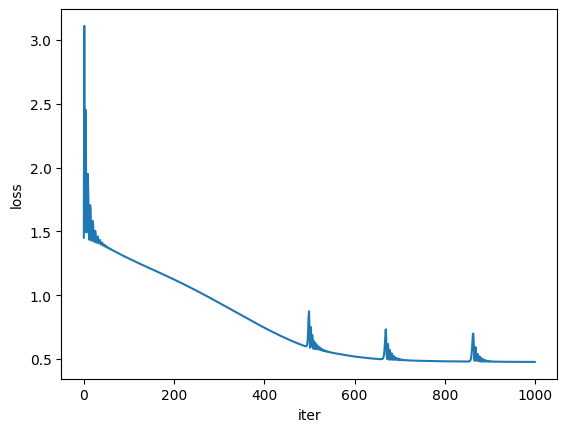

In [732]:
%matplotlib inline
print(min(losses))
py.plot(range(1000),losses)
py.ylabel('loss')
py.xlabel('iter')

In [736]:

with torch.no_grad():
    y_pred=model(x_test.float())
    y_prediction=y_pred[:,[99]]

print(y_prediction,'\n',y_test)


tensor([[0.4194],
        [1.6186],
        [0.4194],
        [1.6186],
        [1.6186],
        [0.4194],
        [0.4194]]) 
 tensor([[0.3660],
        [5.6900],
        [0.0600],
        [1.2300],
        [2.4000],
        [0.4520],
        [0.3340]], dtype=torch.float64)
